# Deep Learning Theoretical Aspects - Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline


Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.
<br>
### answer
A linear combination of linear functions is a linear function.  
No matter how many layers in the neural network (NN), if the NN uses only linear activation function then the last layer will be a linear function of the first layer. A linear activation function turns the NN into just one layer.
### proof
let's assume an input layer $X_{M \times 1}$, a hidden layer $H_{N \times 1}$ and an output layer $Y_{K \times 1}$, and the corrosponding weights $W^{1}_{N \times M}$ & $W^{2}_{K \times N}$ (the biases terms are included), and linear activation function $a(WX)$:

$$ Y_{K \times 1} = W^{2}a(W^{1}X) = W^{2}\big(W^{1}X\big) = W^{2}W^{1}X = \big(W^{2}W^{1}\big)X= W'X $$ 
where is  
$$W'_{K \times M} =  W^{2}_{K \times N} \times W^{1}_{N \times M}$$  
this can be extended to multiple layers

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1 Sigmoid
<img src="https://cdn-images-1.medium.com/max/1200/1*Vo7UFksa_8Ne5HcfEzHNWQ.png" width="150">
<br>
### answer

$$ f(t) = \frac{1}{1+e^{-t}} = \left(1+e^{-t}\right)^{-1} \\    
f'(t) = -\left(1+e^{-t}\right)^{-2} \cdot \left(-e^{-t}\right) = 
\frac{e^{-t}}{\left(1+e^{-t}\right)^{2}} = \frac{e^{-t} +1 -1}{\left(1+e^{-t}\right)^{2}} = \\ 
\frac{1 + e^{-t}}{\left(1+e^{-t}\right)^{2}} - \frac{1}{\left(1+e^{-t}\right)^{2}} = 
\frac{1}{1+e^{-t}} - \frac{1}{\left(1+e^{-t}\right)^{2}} = f(t) - f(t)^2 = f(t) \big(1 - f(t)\big)$$


2 Relu 

<img src="https://cloud.githubusercontent.com/assets/14886380/22743194/73ca0834-ee54-11e6-903f-a7efd247406b.png" width="200">
<br>

### answer

formal derivation
$$
f'(x)=
\begin{cases}
1, & \text{if  } x > 0\\
0, & \text{if  } x < 0\\
\text{undefined}, & x=0
\end{cases}
$$

But since $f'(0)$ does not exist the convention is to treat it as $0$. So we get:
$$
f'(x)=
\begin{cases}
1, & \text{if  } x > 0\\
0, & \text{otherwise}
\end{cases}
$$



3 Softmax
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e348290cf48ddbb6e9a6ef4e39363568b67c09d3" width="250">
<br>
### answer
$ \sigma(Z)_j = \sigma_j = \frac{e^{z_j}}{\sum^K_{k=1}e^{z_k}} = \frac{e^{z_j}}{\sum}$  

$ \frac{\partial e^{z_j}}{\partial z_i} =  
\begin{cases}
e^{z_j}, & \text{if } i=j \\ 
0, & \text{otherwise} 
\end{cases}$
 
$ \frac{\partial \sum}{\partial z_i} = e^{z_i} $  

$ \frac{\partial \sigma_j}{\partial z_i} = \begin{cases}
\frac{ e^{z_j}\sum - e^{z_j}e^{z_i}}{\sum^2} = \frac{e^{z_j}(\sum - e^{z_i})}{\sum^2} = 
\frac{e^{z_j}}{\sum} \frac{\sum - e^{z_i}}{\sum} = 
\frac{e^{z_j}}{\sum} (\frac{\sum}{\sum}-\frac{e^{z_i}}{\sum}) = \sigma_j (1 - \sigma_i), & i=j \\
-\frac{e^{z_j}e^{z_i}}{\sum^2} = -\frac{e^{z_j}}{\sum}\frac{e^{z_i}}{\sum} = 
-\sigma_j\sigma_i = 0 - \sigma_j\sigma_i = \sigma_j (0 - \sigma_i), & i\neq j 
\end{cases} \rightarrow \frac{\partial \sigma_j}{\partial z_i} = \sigma_j (\delta_{ij} - \sigma_i)$  

*$\delta_{ij}$ is the Kronecker delta i.e. $\delta_{ij} = \begin{cases} 1, & i=j \\ 0, & i\ne j \end{cases}$


### Back Propagation
Use the delta rule and backprop to compute the derivatives for these computations.  
Use these values -  
x1 = 1, x2 = 3, x3 = -2, x4 = 2

```
z = x1 + 5*x2 - 3*x3^2
```
$
a = x_1 = 1 \\
b = 5\cdot x_2 = 5\cdot 3 = 15 \\
c = 3\cdot x_3^2 = 3\cdot (-2)^2 = 12 \\
z= a + b - c = 1 + 15 - 12 = 4 \\
$  
$
\frac{\partial a}{\partial x_1} = 1 \\
\frac{\partial b}{\partial x_2} = 5 \\
\frac{\partial c}{\partial x_3} = 6x_3 = -12 \\
\frac{\partial z}{\partial z} = 1 \\
\frac{\partial z}{\partial a} = 1 \\
\frac{\partial z}{\partial b} = 1 \\
\frac{\partial z}{\partial c} = -1 \\
$  

$
\frac{\partial z}{\partial x_1} = \frac{\partial a}{\partial x_1} \frac{\partial z}{\partial a} = 
1 \cdot 1 = 1\\
\frac{\partial z}{\partial x_2} = \frac{\partial b}{\partial x_2} \frac{\partial z}{\partial b} = 
5 \cdot 1 = 5\\
\frac{\partial z}{\partial x_3} = \frac{\partial c}{\partial x_3} \frac{\partial z}{\partial c} = 
-12 \cdot (-1) = 12\\
$

```
z = x1*(x2-4) + exp(x3^2) / 5*x4^2
```
$
a = x_1 = 1 \\
b = x_2 - 4 = 3 - 4 = -1 \\
c = x_3^2 = (-2)^2 = 4 \\
d = 5x_4^2 = 5 \cdot 2^2 = 5\cdot 4 = 20 \\
f = ab = 1 \cdot (-1) = -1 \\
g = e^c = e^4 \\
h = \frac{g}{d} = \frac{e^4}{20} \\
z = f + h = -1 + \frac{e^4}{20} \\
$  
$
\frac{\partial a}{\partial x_1} = 1 \\
\frac{\partial b}{\partial x_2} = 1 \\
\frac{\partial c}{\partial x_3} = 2x_3 = -4 \\
\frac{\partial d}{\partial x_4} = 10x_4 = 20 \\
\frac{\partial f}{\partial a} = b = -1 \\
\frac{\partial f}{\partial b} = a = 1 \\
\frac{\partial g}{\partial c} = g = e^4 \\
\frac{\partial h}{\partial g} = \frac{1}{d} = \frac{1}{20} \\
\frac{\partial h}{\partial d} = -\frac{g}{d^2} = -\frac{e^4}{400} \\
\frac{\partial z}{\partial f} = 1 \\
\frac{\partial z}{\partial h} = 1 \\
\frac{\partial z}{\partial z} = 1 \\
$  
$
\frac{\partial z}{\partial x_1} = 
\frac{\partial z}{\partial f} \frac{\partial f}{\partial a} \frac{\partial a}{\partial x_1} = 
1 \cdot (-1) \cdot 1 = -1 \\
\\
\frac{\partial z}{\partial x_2} = 
\frac{\partial z}{\partial f} \frac{\partial f}{\partial b} \frac{\partial b}{\partial x_2} = 
1 \cdot 1 \cdot 1 = 1 \\
\\
\frac{\partial z}{\partial x_3} = 
\frac{\partial z}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial c} \frac{\partial c}{\partial x_3} = 1 \cdot \frac{1}{20} \cdot e^4 \cdot (-4) = - \frac{e^4}{5} \\
\\
\frac{\partial z}{\partial x_4} = 
\frac{\partial z}{\partial h} \frac{\partial h}{\partial d} \frac{\partial d}{\partial x_4} = 
1 \cdot (-\frac{e^4}{400}) \cdot 20 = - \frac{e^4}{20} \\
$  


```
z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
```
$
a = x_1 = 1 \\
b = x_2 + 3 = 3 + 3 = 6 \\
c = \frac{1}{x_3} = -\frac{1}{2} \\
d = a + 5b = 1 + 5 \cdot 6 = 31 \\
f = d^2 = 31^2 \\
g = e^f = e^{31^2} \\
z = c + g = -\frac{1}{2} + e^{31^2} \\
$  
$
\frac{\partial a}{\partial x_1} = 1 \\
\frac{\partial b}{\partial x_2} = 1 \\
\frac{\partial c}{\partial x_3} = - \frac{1}{x_3^2} = -\frac{1}{4} \\
\frac{\partial d}{\partial a} = 1 \\
\frac{\partial d}{\partial b} = 5 \\
\frac{\partial f}{\partial d} = 2d = 2 \cdot 31 \\
\frac{\partial g}{\partial f} = g = e^{31^2} \\
\frac{\partial z}{\partial c} = 1 \\
\frac{\partial z}{\partial g} = 1 \\  
$  
$
\frac{\partial z}{\partial x_1} = 
\frac{\partial z}{\partial g} \frac{\partial g}{\partial f} \frac{\partial f}{\partial d} 
\frac{\partial d}{\partial a} \frac{\partial a}{\partial x_1} = 
1 \cdot e^{31^2} \cdot 2 \cdot 31 \cdot 1 \cdot 1 = 62e^{31^2} \\
\\
\frac{\partial z}{\partial x_2} = 
\frac{\partial z}{\partial g} \frac{\partial g}{\partial f} \frac{\partial f}{\partial d} 
\frac{\partial d}{\partial b} \frac{\partial b}{\partial x_2} = 
1 \cdot e^{31^2} \cdot 2 \cdot 31^2 \cdot 5 \cdot 1 = 5 \cdot 62e^{31^2} = 310e^{31^2} \\
\\
\frac{\partial z}{\partial x_3} = 
\frac{\partial z}{\partial c} \frac{\partial c}{\partial x_3} = 1 \cdot (-\frac{1}{4}) = - \frac{1}{4} \\
$  


### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

k1 is Identity kernel, it does nothing    
k2 is to shift the image one column to the left   
k3 may be used for edge detection  
k4 is for bluring the image

#### Apply to arrays
Apply the convolutions above to the following array:


In [2]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

we will apply the convolutions both with and w/o padding with stride of 1

In [3]:
# Write your answer here
from scipy.signal import correlate2d

kernels = {'k1': np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
            'k2': np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]]), 
            'k3': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
            'k4': np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9}

for name, kernel in kernels.items():
    print(f'\nkernel {name}: \n{kernel}')
    print('\nw/o padding\n', correlate2d(x, kernel, mode='valid'))  # without padding
    print('\nwith padding\n', correlate2d(x, kernel, mode='same'))  # with 0-padding


kernel k1: 
[[0 0 0]
 [0 1 0]
 [0 0 0]]

w/o padding
 [[-2 -4  0]
 [-2  2  2]
 [-3 -4 -4]]

with padding
 [[-1 -3 -4  0 -1]
 [ 2 -2 -4  0 -2]
 [-3 -2  2  2  3]
 [ 0 -3 -4 -4 -2]
 [-4 -2  2  0  1]]

kernel k2: 
[[0 0 0]
 [0 0 1]
 [0 0 0]]

w/o padding
 [[-4  0 -2]
 [ 2  2  3]
 [-4 -4 -2]]

with padding
 [[-3 -4  0 -1  0]
 [-2 -4  0 -2  0]
 [-2  2  2  3  0]
 [-3 -4 -4 -2  0]
 [-2  2  0  1  0]]

kernel k3: 
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

w/o padding
 [[ -3 -25   4]
 [ -4  33  27]
 [-13 -27 -36]]

with padding
 [[ -5 -15 -23  11  -6]
 [ 27  -3 -25   4 -20]
 [-19  -4  33  27  30]
 [ 14 -13 -27 -36 -18]
 [-27  -7  29   7  14]]

kernel k4: 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

w/o padding
 [[-1.66666667e+00 -1.22222222e+00 -4.44444444e-01]
 [-1.55555556e+00 -1.66666667e+00 -1.00000000e+00]
 [-1.55555556e+00 -1.00000000e+00 -5.55111512e-17]]

with padding
 [[-4.44444444e-01 -1.33333333e+00 -1.44444444e+00 -1.22222

What would be the output dimensions in these cases?
1. No padding, stride of 1 $\rightarrow$ 3x3
2. No padding, stride of 2 $\rightarrow$ 2x2
3. Zero padding, stride of 1 $\rightarrow$ 5x5
4. Zero padding, stride of 2 $\rightarrow$ 3x3

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.  
<br>
### answer
$$ d_O = \frac{d_I - d_K + 2p}{s} + 1 $$
where:  
$d_O$ is the output dimensions (width & height)  
$d_I$ is the input dimensions   
$d_K$ is the kernel dimensions  
$p$ is the padding size  
$s$ is the stride size  
<br>
let's check with the above examples:

1. No padding, stride of 1 $\rightarrow \frac{5 - 3 + 2 \cdot 0}{1} + 1 = 3 \rightarrow 3x3 $
2. No padding, stride of 2 $\rightarrow \frac{5 - 3 + 2 \cdot 0}{2} + 1 = 2 \rightarrow 2x2 $
3. Zero padding, stride of 1 $\rightarrow \frac{5 - 3 + 2 \cdot 1}{1} + 1 = 5 \rightarrow 5x5 $
4. Zero padding, stride of 2 $\rightarrow \frac{5 - 3 + 2 \cdot 1}{2} + 1 = 3 \rightarrow 3x3 $


#### Apply to images
Apply the convolution filters above on the image. Plot the results:

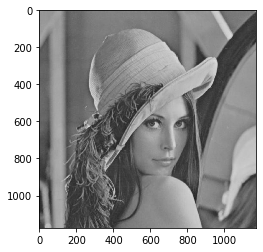

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('lena.jpg')
plt.imshow(im)


We assume that padding is necessary here in order to mainain the original image dimensions.

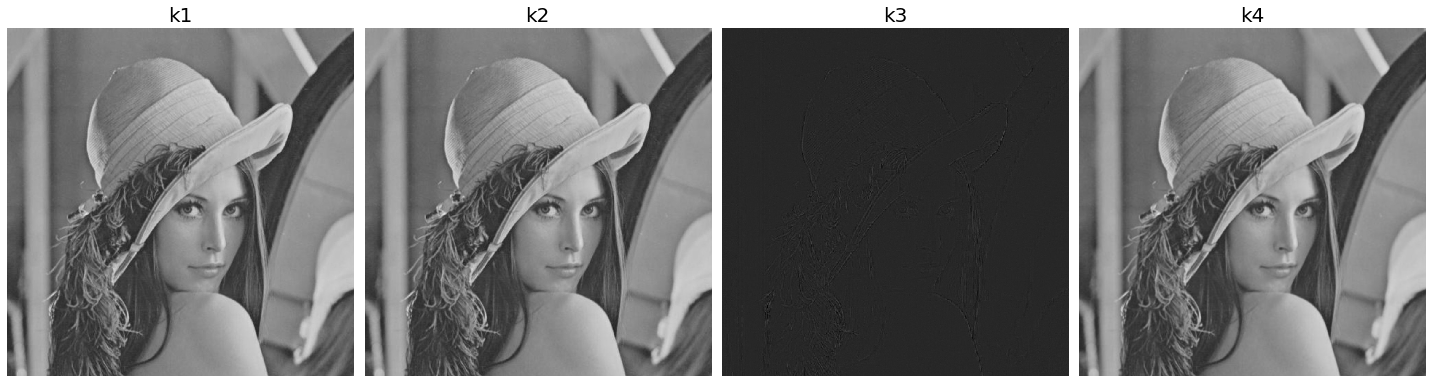

In [5]:
# Write your answer here
plt.figure(figsize=(20, 10))
gray = im.mean(axis=2, dtype=int)
for i, (name, kernel) in enumerate(kernels.items(), start=1):
    c = correlate2d(gray, kernel, mode='same').astype(int)
#     print(c.min(), c.max())
    if c.min() < 0 or c.max() > 255:
        c = (c - c.min()) / (c.max() - c.min())
#     print(c.min(), c.max())
    plt.subplot(1, 4, i)
    plt.imshow(np.tile(c[:, :, np.newaxis], (1, 1, 3)))
#     plt.imshow(c, cmap='gray')
    plt.title(name, fontsize=20)
    plt.axis('off')
plt.tight_layout()

Note that the changes are very small in k2 and k4 - k2 shifts the image by one pixel only, which is something that is difficult to detect by eye, and k4 slightly blurrs the image.

### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).
<br>  

### answer  
Here assume that there is no padding:
- The input in the MNIST dataset is $28 \times 28 \times 1$ (the data is grayscale).
- Convolutional Layer #1: output dimensions: $24 \times24 \times 32$, parameters: 
$\big(5 \times 5 \times 1 + 1 \big) \times 32 = 832$
- Pooling Layer #1: output dimensions: $12 \times 12 \times 32$, parameters: $0$
- Convolutional Layer #2: output dimensions: $ 8 \times 8 \times 64$, parameters: 
$\big(5 \times 5 \times 32 + 1 \big) \times 64 = 51,264$
- Pooling Layer #2: output dimensions: $ 4 \times 4 \times 64$, parameters: $0$
- Dense Layer #1: output dimensions: $1,024 \times 1$, parameters: 
$\big(4 \times 4 \times 64 + 1 \big) \times 1,024 = 1,049,600$  
(dropout will set the 40% of these parameters to zero during training)
- Dense Layer #2 (Logits Layer): output dimensions: $10 \times 1$, parameters: 
$ \big(1,024 + 1\big) \times 10 = 10,250$  
$$ \text{# parameters} = 832 + 51,264 + 1,049,600 + 10,250 = 1,111,946 $$
<br>  
Here we assume padding of 2 to preserve size after convolutional layers:
- The input in the MNIST dataset is $28 \times 28 \times 1$ (the data is grayscale).
- Convolutional Layer #1: output dimensions: $24 \times24 \times 32$, parameters: 
$\big(5 \times 5 \times 1 + 1 \big) \times 32 = 832$
- Pooling Layer #1: output dimensions: $14 \times 14 \times 32$, parameters: $0$ 
- Convolutional Layer #2: output dimensions: $ 14 \times 14 \times 64$, parameters: 
$\big(5 \times 5 \times 32 + 1 \big) \times 64 = 51,264$
- Pooling Layer #2: output dimensions: $ 7 \times 7 \times 64$, parameters: $0$
- Dense Layer #1: output dimensions: $1,024 \times 1$, parameters: 
$\big(7 \times 7 \times 64 + 1 \big) \times 1,024 = 3,212,288$   
(dropout will set the 40% of these parameters to zero during training)
- Dense Layer #2 (Logits Layer): output dimensions: $10 \times 1$, parameters: 
$ \big(1,024 + 1\big) \times 10 = 10,250$
$$ \text{# parameters} = 832 + 51,264 + 3,212,288 + 10,250 = 3,274,634 $$


### Learning in biological neurons
Try to come up with a learning algorithm for a neural network that replaces back propagation, and mimicks the operation of biological neurons.
<br>
### answer
One such biological (& unsupervised) learning rule is Hebb's law: Neuron's that fire together, wire together
$ \rightarrow w_{ij} = x_i x_j $

The idea for applying this to a fully connected neural network for example would be that the connections between active neurons would be strengthened (and their weights will increase), while the connections between neurons that are not active will be weakened, and may even detatch altogether, with new connections being formed between active neurons. This will 'prune' connections that are inactive, and strengthen connections that are highly active.

### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.  
<br>  
### answer
This question can be understood in two ways:

If we are to find more challenging images of the same kind (e.g. Chihuahua or muffin) using the 3 networks, we can look for images where the top 5 predictions for at least two of the networks contain both Chuhuahua and muffin.

If we are to find more cases of such funny challenging pairs, we can look at the correlation between the top 5 predicted probabilities of images from different categories, across a large set of images. Categories that have a high possitive correlation in their predicted probabilities may be similiar. In order for these pairs to be funny though, we may need to sort them manually, since this semantic information is highly difficult to convey (for example, two breeds of dogs may be hightly confused with one another, an there may be a high correlation between the predicted probabilities of these two categories, however this is not necesarily a funny pair).

#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:


<img src="http://ufldl.stanford.edu/wiki/images/math/a/2/3/a23bea0ab48ded7b9a979b68f6356613.png" width="250">

We'll numerically approximate it using:

<img src="http://ufldl.stanford.edu/wiki/images/math/4/8/a/48a000aed96c8595fcca2a45f48343ce.png" width="250">

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [6]:
# here we compute the gradient of the sigmoid function numerically and analitically, 
# and compare the results across all dimensions.

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sum_sig(x):
    return np.sum(sigmoid(x))

def sum_sigmoid_grad(x):
    return sigmoid(x)*(1-sigmoid(x))

def numerical_grad(f, x, epsilon):
    orig_shape = np.shape(x)
    x_flat = np.reshape(x,-1)
    grad = np.zeros_like(x_flat).astype(np.float)
    for i in range(len(x_flat)):
        x_plus = x_flat.copy()
        x_plus[i] = x_flat[i]+epsilon
        x_minus = x_flat.copy()
        x_minus[i] = x_flat[i]-epsilon
        grad[i] = (f(x_plus)-f(x_minus))/(2*epsilon)
    grad = np.reshape(grad, orig_shape)
    return grad

# x = np.random.randn(2,3,4)*50
x = np.random.uniform(-5, 5, (2, 3, 4))
print(x)
print('Difference between analytic and numerical gradient:')
eps = 1e-5
sum_sigmoid_grad(x)-numerical_grad(sum_sig, x, eps)

[[[-4.69586846  2.44910703  1.65593465  3.94029429]
  [-4.01041833  2.48507621 -1.47032669  1.19681099]
  [ 0.47619305 -1.95725306 -3.64517886  1.23973643]]

 [[ 3.93189561  0.70079405  2.97823874  1.95845005]
  [ 2.63081806 -1.75259153 -0.06153546 -3.9001769 ]
  [ 4.2560145  -2.40959314 -0.27451276  4.33356018]]]
Difference between analytic and numerical gradient:


array([[[ 1.13114554e-10, -7.36519179e-11,  7.98203170e-12,
          1.11078043e-10],
        [ 7.43449087e-11, -2.05488543e-11, -9.70907799e-11,
          3.31629446e-11],
        [-3.04699876e-11, -1.30002703e-10,  5.43940518e-11,
         -6.04880868e-11]],

       [[ 8.78426602e-11, -3.09522408e-11,  4.98142916e-11,
         -9.83741144e-11],
        [ 5.58452729e-11, -5.87355165e-12,  2.63832844e-11,
          9.09649925e-11],
        [-2.11504893e-11,  5.69910646e-11,  8.11850587e-14,
         -1.13466146e-10]]])

In [7]:
# # here we compute the gradient of the sigmoid function numerically and analitically, 
# # and compare the results across all dimensions.

# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def d_sigmoid(x):
#     return sigmoid(x) * (1 - sigmoid(x))

# def fwd_prop(f, x):
#     return np.sum(f(x), axis=0)

# def numeric_grad(f, x, epsilon=1e-5):
    
#     x_plus = np.repeat(x.reshape(1, -1), x.size, axis=0)
#     x_minus = np.repeat(x.reshape(1, -1), x.size, axis=0)
    
#     x_plus.flat[::x_plus.shape[1]+1] += epsilon
#     x_minus.flat[::x_minus.shape[1]+1] -= epsilon
    
#     grad = (fwd_prop(f, x_plus) - fwd_prop(f, x_minus)) / (2 * epsilon)
#     return grad.reshape(x.shape)

# def gradient_checker(f, df, x, eps=1e-5, tol=1e-7):
#     grad = df(x).flatten()
#     grad_approx = numeric_grad(f, x, epsilon=eps).flatten()
    
#     numerator = np.linalg.norm(grad_approx - grad) 
#     denominator = np.linalg.norm(grad_approx) + np.linalg.norm(grad)
#     difference =  numerator/denominator 

#     print(f"Gradient is{'' if difference < tol else ' not'} OK. difference = {difference}")


# x = np.random.uniform(-5, 5, (2, 3, 4))
# gradient_checker(sigmoid, d_sigmoid, x)